## **Upload Dataset**

In [ ]:
#from google.colab import files
#up = files.upload()

## **Import Necessary Library Functions**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # For co-relation matrix
import warnings
warnings.filterwarnings('ignore')                    # Ignore any warning

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from imblearn.under_sampling import RandomUnderSampler  # For converting imbalced data to balaced data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix

## Dataset Read

In [ ]:
data = pd.read_csv("heart_2020.csv")

In [ ]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [ ]:
data.shape

(50000, 18)

In [ ]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [ ]:
data['HeartDisease'].unique()

array(['No', 'Yes'], dtype=object)

<Axes: >

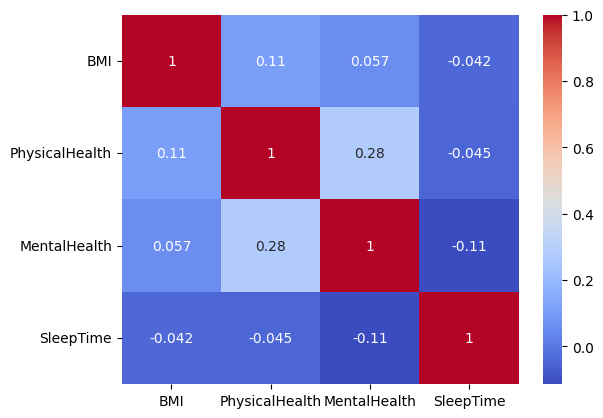

In [ ]:
# compute the correlation matrix
corr_matrix = data.corr()
# plot the correlation matrix using seaborn
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

### **Dataset pre-preocessing**

In [ ]:
#NULL Checking

data.isnull().sum()

HeartDisease         0
BMI                  0
Smoking              0
AlcoholDrinking      0
Stroke               0
PhysicalHealth       0
MentalHealth         0
DiffWalking          0
Sex                 15
AgeCategory          0
Race                 0
Diabetic             0
PhysicalActivity     0
GenHealth            0
SleepTime            0
Asthma               0
KidneyDisease        0
SkinCancer           0
dtype: int64

In [ ]:
#Delete Row with NULL Values

data = data.dropna(subset=['Sex'], axis=0)

In [ ]:
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49985 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      49985 non-null  object 
 1   BMI               49985 non-null  float64
 2   Smoking           49985 non-null  object 
 3   AlcoholDrinking   49985 non-null  object 
 4   Stroke            49985 non-null  object 
 5   PhysicalHealth    49985 non-null  int64  
 6   MentalHealth      49985 non-null  int64  
 7   DiffWalking       49985 non-null  object 
 8   Sex               49985 non-null  object 
 9   AgeCategory       49985 non-null  object 
 10  Race              49985 non-null  object 
 11  Diabetic          49985 non-null  object 
 12  PhysicalActivity  49985 non-null  object 
 13  GenHealth         49985 non-null  object 
 14  SleepTime         49985 non-null  int64  
 15  Asthma            49985 non-null  object 
 16  KidneyDisease     49985 non-null  object

In [ ]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,No,21.62,No,No,No,0,0,No,Male,80 or older,White,No,Yes,Excellent,8,No,No,No
49996,No,35.26,No,No,No,0,20,No,Male,40-44,White,No,Yes,Very good,7,No,No,No
49997,No,28.17,No,No,No,0,0,No,Female,18-24,Hispanic,Yes (during pregnancy),No,Very good,6,No,No,No
49998,No,27.02,Yes,No,No,4,28,No,Female,65-69,White,No,Yes,Good,6,No,No,No


In [ ]:
categorical_features = ['HeartDisease','Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
                        'Sex', 'AgeCategory','Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
                        'Asthma', 'KidneyDisease', 'SkinCancer']

# perform ordinal encoding on the categorical features
encoder = OrdinalEncoder()
data[categorical_features] = encoder.fit_transform(data[categorical_features]) # converting to numerical values

In [ ]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,16.60,1.0,0.0,0.0,3,30,0.0,0.0,7.0,5.0,2.0,1.0,4.0,5,1.0,0.0,1.0
1,0.0,20.34,0.0,0.0,1.0,0,0,0.0,0.0,12.0,5.0,0.0,1.0,4.0,7,0.0,0.0,0.0
2,0.0,26.58,1.0,0.0,0.0,20,30,0.0,1.0,9.0,5.0,2.0,1.0,1.0,8,1.0,0.0,0.0
3,0.0,24.21,0.0,0.0,0.0,0,0,0.0,0.0,11.0,5.0,0.0,0.0,2.0,6,0.0,0.0,1.0
4,0.0,23.71,0.0,0.0,0.0,28,0,1.0,0.0,4.0,5.0,0.0,1.0,4.0,8,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,21.62,0.0,0.0,0.0,0,0,0.0,1.0,12.0,5.0,0.0,1.0,0.0,8,0.0,0.0,0.0
49996,0.0,35.26,0.0,0.0,0.0,0,20,0.0,1.0,4.0,5.0,0.0,1.0,4.0,7,0.0,0.0,0.0
49997,0.0,28.17,0.0,0.0,0.0,0,0,0.0,0.0,0.0,3.0,3.0,0.0,4.0,6,0.0,0.0,0.0
49998,0.0,27.02,1.0,0.0,0.0,4,28,0.0,0.0,9.0,5.0,0.0,1.0,2.0,6,0.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49985 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      49985 non-null  float64
 1   BMI               49985 non-null  float64
 2   Smoking           49985 non-null  float64
 3   AlcoholDrinking   49985 non-null  float64
 4   Stroke            49985 non-null  float64
 5   PhysicalHealth    49985 non-null  int64  
 6   MentalHealth      49985 non-null  int64  
 7   DiffWalking       49985 non-null  float64
 8   Sex               49985 non-null  float64
 9   AgeCategory       49985 non-null  float64
 10  Race              49985 non-null  float64
 11  Diabetic          49985 non-null  float64
 12  PhysicalActivity  49985 non-null  float64
 13  GenHealth         49985 non-null  float64
 14  SleepTime         49985 non-null  int64  
 15  Asthma            49985 non-null  float64
 16  KidneyDisease     49985 non-null  float6

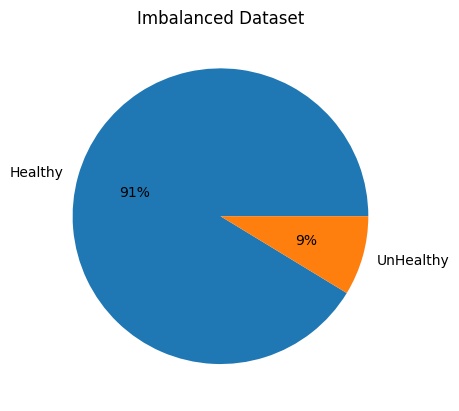

In [ ]:
disease_count = data['HeartDisease'].value_counts()

labels = ['Healthy','UnHealthy']
plt.title('Imbalanced Dataset')
plt.pie(disease_count, labels = labels, autopct='%.0f%%')
plt.show()

## Convert the imbalanced data to balanced data

In [ ]:
#create independent and Dependent Feature

columns = data.columns.tolist()
columns = [c for c in columns if c not in ["HeartDisease"]]
target = "HeartDisease"
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
x_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))

In [ ]:
under_sampler = RandomUnderSampler()
x, y = under_sampler.fit_resample(X, Y)
x.shape, y.shape

((8698, 17), (8698,))

In [ ]:
# dataset Splitting

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
# feature scaling

scaler=MinMaxScaler()
scaler.fit(X_train)

# transform
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,16.60,1.0,0.0,0.0,3,30,0.0,0.0,7.0,5.0,2.0,1.0,4.0,5,1.0,0.0,1.0
1,0.0,20.34,0.0,0.0,1.0,0,0,0.0,0.0,12.0,5.0,0.0,1.0,4.0,7,0.0,0.0,0.0
2,0.0,26.58,1.0,0.0,0.0,20,30,0.0,1.0,9.0,5.0,2.0,1.0,1.0,8,1.0,0.0,0.0
3,0.0,24.21,0.0,0.0,0.0,0,0,0.0,0.0,11.0,5.0,0.0,0.0,2.0,6,0.0,0.0,1.0
4,0.0,23.71,0.0,0.0,0.0,28,0,1.0,0.0,4.0,5.0,0.0,1.0,4.0,8,0.0,0.0,0.0


# **Model Training**

In [ ]:
accuracy = []
precision=[]
recall=[]
f1=[]

In [ ]:
knn = KNeighborsClassifier()

knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
accuracy.append(accuracy_score(y_test, y_pred))
precision.append(precision_score(y_test,y_pred)) #ratio of true positive predictions to the total number of positive predictions
recall.append(recall_score(y_test,y_pred)) #  ratio of true positive predictions to the total number of actual positive cases.
f1.append(f1_score(y_test,y_pred))  # harmonic mean of precision and recall

<Axes: title={'center': 'Confusion Matrix for KNeighborsClassifier'}>

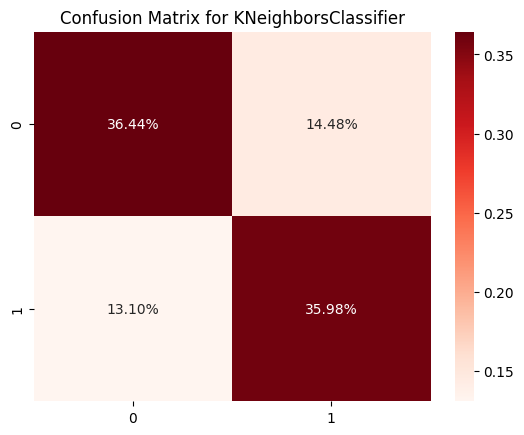

In [ ]:
# confusion Maxtrix
cm1 = confusion_matrix(y_test, y_pred)
plt.title('Confusion Matrix for KNeighborsClassifier')
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')

In [ ]:
lgr = LogisticRegression()

lgr.fit(X_train_scaled, y_train)
y_pred = lgr.predict(X_test_scaled)
accuracy.append(accuracy_score(y_test, y_pred))
precision.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))

<Axes: title={'center': 'Confusion Matrix for LogisticRegression'}>

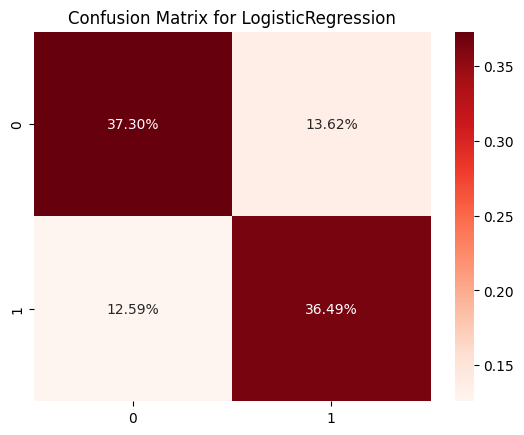

In [ ]:
# confusion Maxtrix
cm1 = confusion_matrix(y_test, y_pred)
plt.title('Confusion Matrix for LogisticRegression')
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')

In [ ]:
svm = SVC()

svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)
accuracy.append(accuracy_score(y_test, y_pred))
precision.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))

<Axes: title={'center': 'Confusion Matrix for SVM'}>

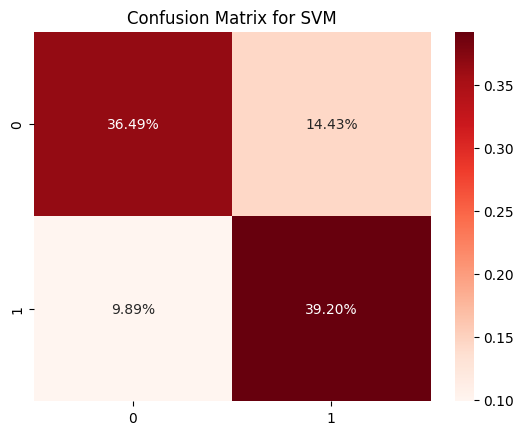

In [ ]:
# confusion Maxtrix
cm1 = confusion_matrix(y_test, y_pred)
plt.title('Confusion Matrix for SVM')
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')

In [ ]:
models = ['KNN','LogisticRegression','SVM']

print(f'Models : {models}')
print(f'Accuracy : {accuracy}')
print(f'Precision : {precision}')
print(f'Recall : {recall}')
print(f'F1 : {f1}')

Models : ['KNN', 'LogisticRegression', 'SVM']
Accuracy : [0.7241379310344828, 0.7379310344827587, 0.756896551724138]
Precision : [0.7129840546697038, 0.7282110091743119, 0.7309753483386924]
Recall : [0.7330210772833724, 0.7435597189695551, 0.7985948477751756]
F1 : [0.7228637413394918, 0.7358053302433372, 0.7632904308897593]


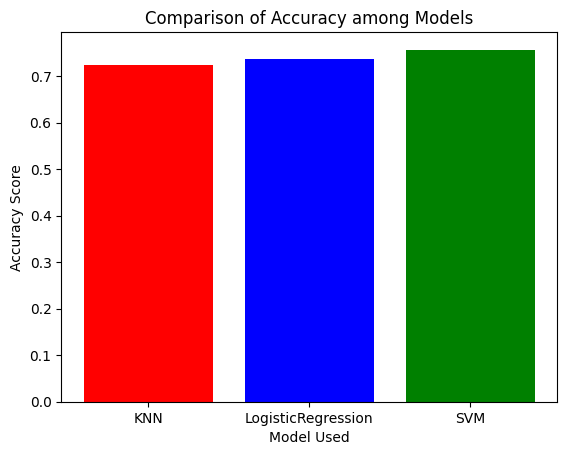

In [ ]:
#Plot Accuracy

# plot the accuracy
plt.bar(models, accuracy, color = ['red','blue','green'])

# add labels and title
plt.xlabel('Model Used')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Accuracy among Models')
plt.show()

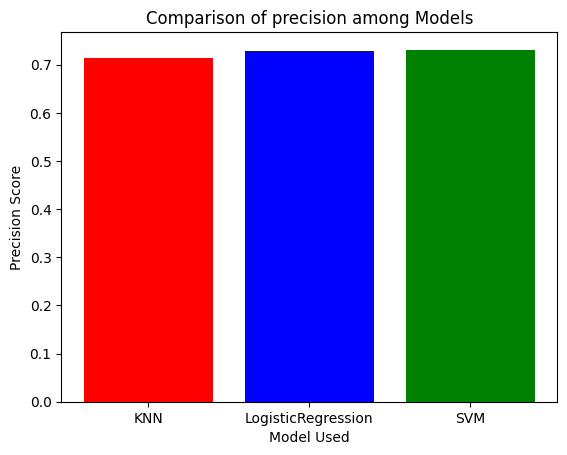

In [ ]:
#Plot Precison

# plot the accuracy
plt.bar(models, precision, color = ['red','blue','green'])

# add labels and title
plt.xlabel('Model Used')
plt.ylabel('Precision Score')
plt.title('Comparison of precision among Models')
plt.show()

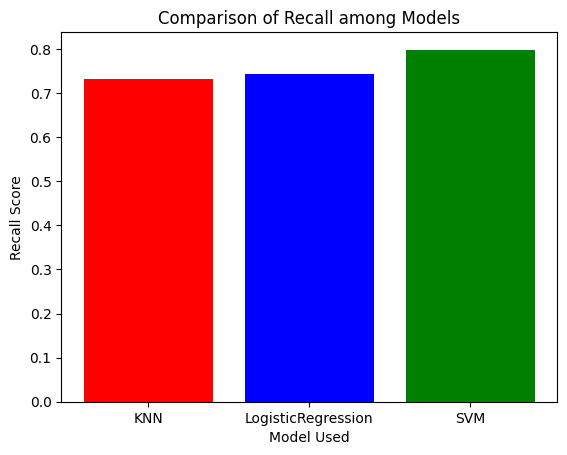

In [ ]:
#Plot Recall

# plot the accuracy
plt.bar(models, recall, color = ['red','blue','green'])

# add labels and title
plt.xlabel('Model Used')
plt.ylabel('Recall Score')
plt.title('Comparison of Recall among Models')
plt.show()

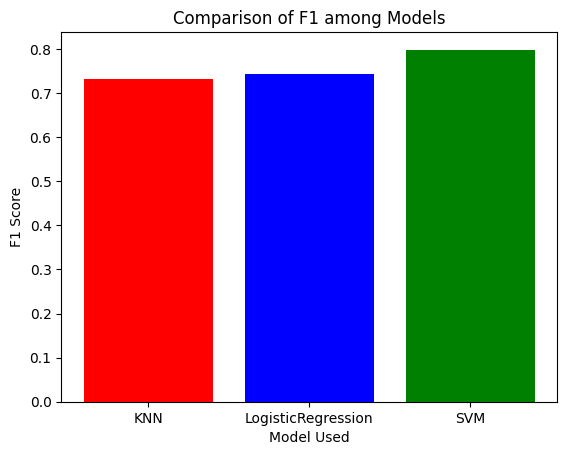

In [ ]:
#Plot f1_score

# plot the accuracy
plt.bar(models, recall, color = ['red','blue','green'])

# add labels and title
plt.xlabel('Model Used')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 among Models')
plt.show()

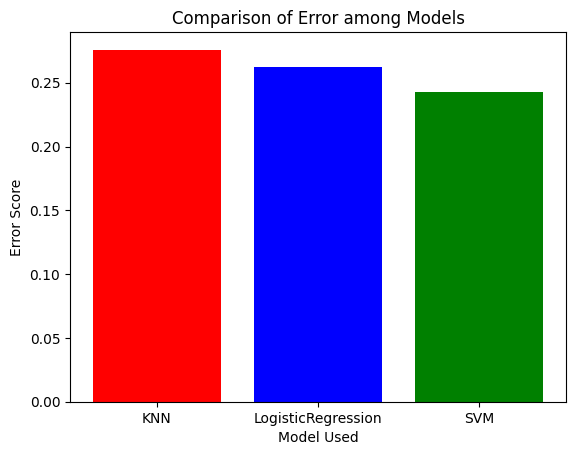

In [ ]:
#Plot Error
error = []
for i in accuracy:
  error.append(1-i)
# plot the error
plt.bar(models, error, color = ['red','blue','green'])
# add labels and title
plt.xlabel('Model Used')
plt.ylabel('Error Score')
plt.title('Comparison of Error among Models')
plt.show()

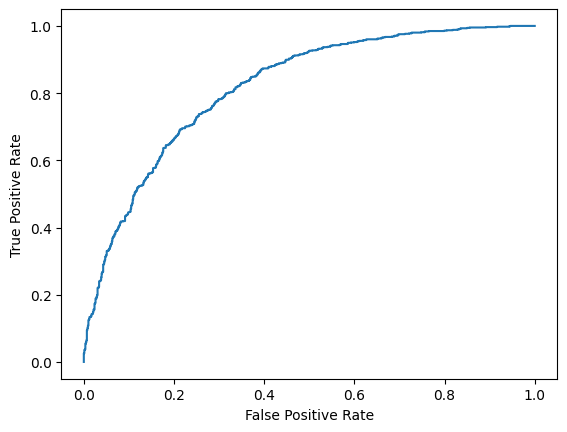

In [ ]:
from sklearn import metrics
y_pred_proba = lgr.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

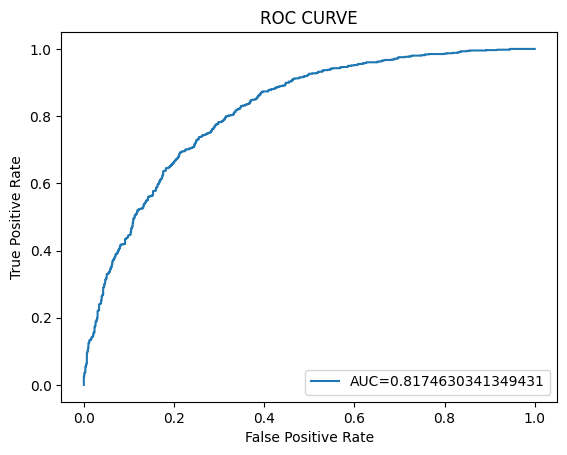

In [ ]:
y_pred_proba = lgr.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.title('ROC CURVE')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()